## Predict House Prices

### This algorithm is modeled to get the best fit line in the graph. "y=mx+c , m=slope/gradient , c=intercept"
### Delta1 , delta2 = difference between the datapoints and the line generated using linear equation. To get the best fit line minimize the delta by doing summation of all the delta square. the minimum delta value for the line is the best fit line.

### The line is drawn using a linear equation

### y(price) = mx(area) + b , y = dependent variable , x = indepedent variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


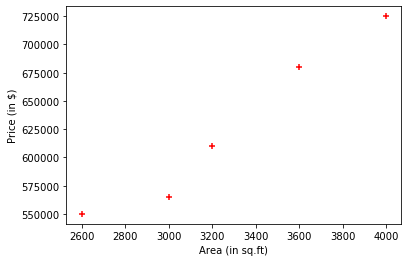

In [4]:
%matplotlib inline
plt.xlabel('Area (in sq.ft)')
plt.ylabel('Price (in $)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [5]:
# create an object for linear_Regression
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)  # 1st -> 2D-array (X matrix) # 2nd -> Y vector

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
reg.predict([[3300]])

array([628715.75342466])

### Discussion on how the algorithm predicted the above value for price

In [7]:
# linear equation : y = mx + b
# m -> coefficient
# b -> intercept
reg.coef_

array([135.78767123])

In [8]:
reg.intercept_

180616.43835616432

In [9]:
# y is the predicted value
y = 135.78767123 * 3300 + 180616.43835616432
y

628715.7534151643

### Predict for a list of area 

In [10]:
d = pd.read_csv('areas.csv')
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [11]:
p = reg.predict(d)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [12]:
# create a new column in DataFrame
d['prices'] = p

In [13]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [14]:
d.to_csv('prediction.csv',index=False)

### Same steps with display of Linear Equation Line

In [15]:
df = pd.read_csv("homeprices.csv")
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

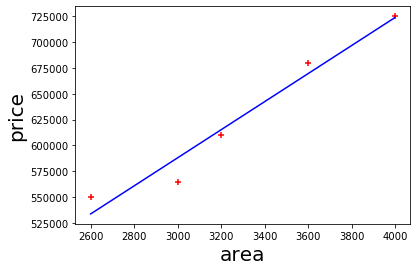

In [16]:
%matplotlib inline
plt.xlabel('area',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [17]:
reg.predict([[5000]])

array([859554.79452055])

In [18]:
import pickle

In [20]:
with open('model_reg_pickle','wb') as f:
    pickle.dump(reg,f)

In [21]:
with open('model_reg_pickle','rb') as f:
    mp = pickle.load(f)

In [22]:
mp.predict([[5000]])

array([859554.79452055])

In [24]:
import joblib

In [26]:
joblib.dump(reg,'model_reg_joblib')

['model_reg_joblib']

In [27]:
mj = joblib.load('model_reg_joblib')

In [28]:
mj.predict([[5000]])

array([859554.79452055])